In [16]:
from glob import glob
import pandas as pd

In [17]:
files = glob('training_setA/*')

In [18]:
files

['training_setA/p016161.csv',
 'training_setA/p112475.csv',
 'training_setA/p105109.csv',
 'training_setA/p019252.csv',
 'training_setA/p102666.csv',
 'training_setA/p006372.csv',
 'training_setA/p009041.csv',
 'training_setA/p103578.csv',
 'training_setA/p010510.csv',
 'training_setA/p114004.csv',
 'training_setA/p104217.csv',
 'training_setA/p000703.csv',
 'training_setA/p014776.csv',
 'training_setA/p110262.csv',
 'training_setA/p013019.csv',
 'training_setA/p100071.csv',
 'training_setA/p004565.csv',
 'training_setA/p012307.csv',
 'training_setA/p116613.csv',
 'training_setA/p119520.csv',
 'training_setA/p106400.csv',
 'training_setA/p002114.csv',
 'training_setA/p015468.csv',
 'training_setA/p109733.csv',
 'training_setA/p106366.csv',
 'training_setA/p002672.csv',
 'training_setA/p109055.csv',
 'training_setA/p012461.csv',
 'training_setA/p116175.csv',
 'training_setA/p119246.csv',
 'training_setA/p101409.csv',
 'training_setA/p100717.csv',
 'training_setA/p118158.csv',
 'training

In [19]:
len(files)

40336

In [20]:
files[0]

'training_setA/p016161.csv'

In [21]:
p_5 = pd.read_csv(files[0],sep='|')
p_5

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,74,100,37.11,NaN,101,NaN,14.5,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,3,1
1,72,98,NaN,NaN,81,NaN,14.5,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,4,1
2,75,100,NaN,NaN,83,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,5,1
3,63,100,NaN,NaN,64,NaN,14.0,NaN,NaN,37.0,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,6,1
4,61,100,37.17,NaN,66,NaN,14.5,NaN,NaN,37.0,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,7,1
5,68,100,NaN,NaN,63,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,8,1
6,64,100,NaN,NaN,94,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,9,1
7,66,100,NaN,NaN,83,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,47.2,1,NaN,NaN,-0.01,10,1


## joining all the data

In [22]:
data = pd.concat( (pd.read_csv(file,sep='|') for file in files),ignore_index=True )

In [23]:
data.tail()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
1552205,82.0,98.0,NaN,110.0,68.00,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,61.27,0,0.0,1.0,-6.73,21,0
1552206,85.0,99.0,36.33,90.0,58.00,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,61.27,0,0.0,1.0,-6.73,22,0
1552207,82.0,100.0,NaN,91.0,61.00,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,61.27,0,0.0,1.0,-6.73,23,0
1552208,97.0,100.0,NaN,100.0,64.67,NaN,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,61.27,0,0.0,1.0,-6.73,24,0
1552209,89.0,99.0,NaN,111.0,71.67,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,61.27,0,0.0,1.0,-6.73,25,0


In [24]:
count_NAs = data.isna().sum()
test = count_NAs/len(data)*100

In [31]:
test[test>40].index # na > 40%

Index(['Temp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets'],
      dtype='object')

In [34]:
to_drop = test[test>40].index.tolist()

In [36]:
df = data.drop(columns = to_drop)

In [38]:
df = df.drop(columns = ['Unit1','Unit2'])

In [41]:
df = df.fillna(df.median())

In [42]:
df

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,74.0,100.0,121.0,101.00,62.0,14.5,47.20,1,-0.01,3,1
1,72.0,98.0,121.0,81.00,62.0,14.5,47.20,1,-0.01,4,1
2,75.0,100.0,121.0,83.00,62.0,14.0,47.20,1,-0.01,5,1
3,63.0,100.0,121.0,64.00,62.0,14.0,47.20,1,-0.01,6,1
4,61.0,100.0,121.0,66.00,62.0,14.5,47.20,1,-0.01,7,1
...,...,...,...,...,...,...,...,...,...,...,...
1552205,82.0,98.0,110.0,68.00,62.0,17.0,61.27,0,-6.73,21,0
1552206,85.0,99.0,90.0,58.00,62.0,15.0,61.27,0,-6.73,22,0
1552207,82.0,100.0,91.0,61.00,62.0,13.0,61.27,0,-6.73,23,0
1552208,97.0,100.0,100.0,64.67,62.0,18.0,61.27,0,-6.73,24,0


In [45]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [51]:
def get_scores(y_true, y_pred, y_prob):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob)}")

In [46]:
X = df.drop(columns =['SepsisLabel'])
y = df['SepsisLabel']

In [49]:
seed = 101
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# model training

# XG Boost

In [97]:
print('init model')
model = XGBClassifier()
model.fit(X_train, y_train)
print('model trained')

init model
model trained


In [98]:
# model prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[457268,     47],
       [  8141,    207]])

In [101]:
get_scores(y_test, y_pred, y_prob)

Accuracy: 0.9824164685620288
Recall: 0.024796358409199807
Precision: 0.8149606299212598
ROC AUC: 0.8608026389959212


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

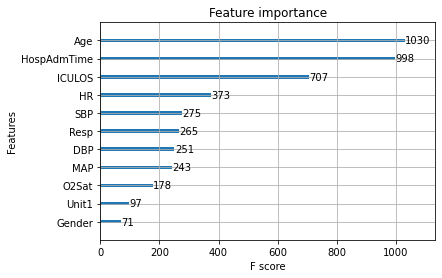

In [103]:
plot_importance(model)

In [55]:
from sklearn import preprocessing
# Get column names first
names = X.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [56]:
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [58]:
seed = 101
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=test_size, random_state=seed)
# model training
print('init model')
model = XGBClassifier()
model.fit(X_train, y_train)
print('model trained')

init model
model trained


In [59]:
# model prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
confusion_matrix(y_test, y_pred)
get_scores(y_test, y_pred, y_prob)

Accuracy: 0.9824293534165266
Recall: 0.025634882606612362
Precision: 0.816793893129771
ROC AUC: 0.8523874742859224


In [60]:
logisticRegr = LogisticRegression()

In [61]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [62]:
print('Training score')
get_scores(y_train, logisticRegr.predict(X_train),logisticRegr.predict_proba(X_train)[:,1])

print('Test score')
get_scores(y_test, logisticRegr.predict(X_test),logisticRegr.predict_proba(X_test)[:,1])

Training score
Accuracy: 0.98188665561637
Recall: 0.0016864268192968112
Precision: 0.18435754189944134
ROC AUC: 0.7072760088634166
Test score
Accuracy: 0.9819955633151013
Recall: 0.0023957834211787254
Precision: 0.2631578947368421
ROC AUC: 0.7075376249164536


# gradient boost

In [92]:
to_drop = test[test>30].index.tolist()
df = data.drop(columns = to_drop)

In [ ]:
df = df.fillna(df.median())

In [81]:
X = df.drop(columns =['SepsisLabel'])
y = df['SepsisLabel']

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
seed = 101
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# model training

In [84]:
zero = len(y_train[y_train== 0])
zero

1066979

In [85]:
one = len(y_train[y_train== 1])
one

19568

In [86]:
import numpy as np

In [87]:
w0=(one/zero)*2
w1=1
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = w0
sample_weights[y_train == 1] = w1


GBC=GradientBoostingClassifier(n_estimators=100,learning_rate = 0.1, subsample=0.5)
GBC.fit(X_train, y_train,sample_weights)

GradientBoostingClassifier(subsample=0.5)

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, GBC.predict(X_test))

array([[421220,  36095],
       [  4635,   3713]])

In [89]:
print('Training score')
get_scores(y_train, GBC.predict(X_train),GBC.predict_proba(X_train)[:,1])

print('Test score')
get_scores(y_test, GBC.predict(X_test),GBC.predict_proba(X_test)[:,1])

Training score
Accuracy: 0.9128689324990084
Recall: 0.44516557645134913
Precision: 0.09414651017011434
ROC AUC: 0.7930372081330624
Test score
Accuracy: 0.9125333127175661
Recall: 0.44477719214183037
Precision: 0.09327270900321544
ROC AUC: 0.7917523169564546


In [108]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

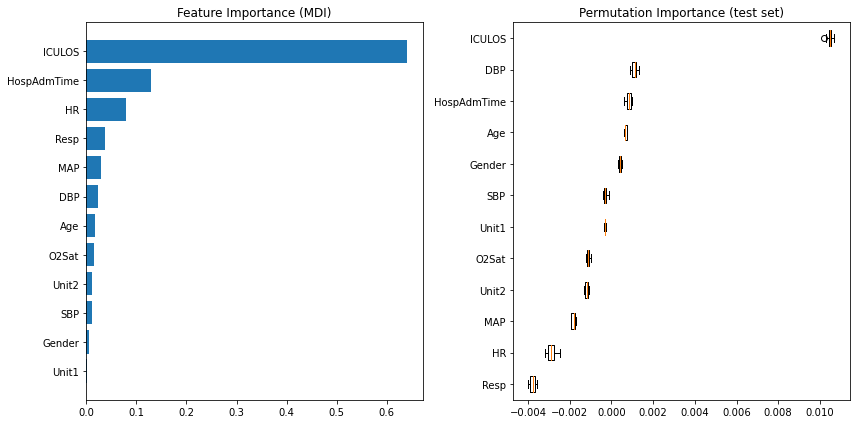

In [110]:
feature_importance = GBC.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(GBC, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [93]:
df.describe()

,HR,O2Sat,SBP,MAP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,1.398811e+06,1.349474e+06,1.325945e+06,1.358940e+06,1.313875e+06,1.552210e+06,1.552210e+06,1.552202e+06,1.552210e+06,1.552210e+06
mean,8.458144e+01,9.719395e+01,1.237505e+02,8.240010e+01,1.872650e+01,6.200947e+01,5.592690e-01,-5.612512e+01,2.699499e+01,1.798468e-02
std,1.732524e+01,2.936924e+00,2.323156e+01,1.634175e+01,5.098194e+00,1.638622e+01,4.964749e-01,1.622569e+02,2.900542e+01,1.328956e-01
min,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,1.400000e+01,0.000000e+00,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,1.070000e+02,7.100000e+01,1.500000e+01,5.168000e+01,0.000000e+00,-4.705000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,1.210000e+02,8.000000e+01,1.800000e+01,6.400000e+01,1.000000e+00,-6.030000e+00,2.100000e+01,0.000000e+00
75%,9.550000e+01,9.950000e+01,1.380000e+02,9.200000e+01,2.150000e+01,7.400000e+01,1.000000e+00,-4.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,1.000000e+02,1.000000e+00,2.399000e+01,3.360000e+02,1.000000e+00


In [94]:
df.corr()

,HR,O2Sat,SBP,MAP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
HR,1.000000,-0.075651,-0.033710,0.069777,0.225994,-0.157255,-0.030851,-0.054158,0.045364,0.048987
O2Sat,-0.075651,1.000000,0.024909,0.025553,-0.147493,-0.049195,-0.031281,-0.010307,-0.044212,-0.009338
SBP,-0.033710,0.024909,1.000000,0.780469,0.045887,0.024524,-0.015066,0.034819,0.056302,-0.013375
MAP,0.069777,0.025553,0.780469,1.000000,0.049081,-0.148738,0.002264,0.037496,0.032628,-0.018796
Resp,0.225994,-0.147493,0.045887,0.049081,1.000000,0.032597,0.002871,-0.026744,0.097983,0.046304
Age,-0.157255,-0.049195,0.024524,-0.148738,0.032597,1.000000,-0.030520,-0.009470,0.010453,0.000191
Gender,-0.030851,-0.031281,-0.015066,0.002264,0.002871,-0.030520,1.000000,-0.000834,0.014103,0.009280
HospAdmTime,-0.054158,-0.010307,0.034819,0.037496,-0.026744,-0.009470,-0.000834,1.000000,-0.064456,-0.019051
ICULOS,0.045364,-0.044212,0.056302,0.032628,0.097983,0.010453,0.014103,-0.064456,1.000000,0.133774
SepsisLabel,0.048987,-0.009338,-0.013375,-0.018796,0.046304,0.000191,0.009280,-0.019051,0.133774,1.000000


In [95]:
import seaborn as sns

<AxesSubplot:>

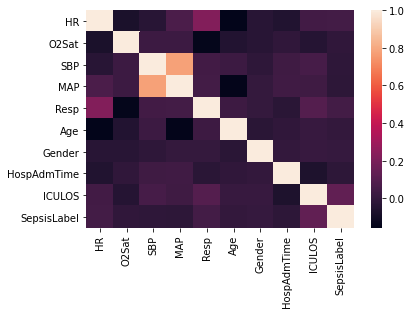

In [96]:
sns.heatmap(df.corr())

In [111]:
X.columns

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS'],
      dtype='object')